# Setup

In [1]:
import pandas as pd
import numpy as np
import scipy
import math

In [45]:
import scipy.integrate as integrate
from scipy.io import wavfile
import sounddevice as sd
import pydub
from scipy import signal as scipy_signal

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.available
plt.style.use('tableau-colorblind10')

In [4]:
# %matplotlib notebook
%matplotlib inline

# Unit 1 Fourier Series

## mat_rec 1

Find 100 fourier coefficients

In [ ]:
1/math.pi

In [ ]:
b = np.zeros((1,100))
for k in range(100):
    f1 = lambda t: math.sin(k*t)
    f2 = lambda t: -math.sin(k*t)
    b[0,k] = (1/math.pi)*(integrate.quad(f2,-math.pi,0)[0] + integrate.quad(f1,0,math.pi)[0])
    if b[0,k] < 10e-5:
        b[0,k] = 0

In [ ]:
b[0,:]

In [ ]:
fig, ax = plt.subplots(figsize=(12,6),nrows=1, ncols=1)
sns.barplot(x=list(range(100)),y=b[0,:], ax=ax)
plt.show()

## mat_rec 2

In [ ]:
!ls mat_rec2

### comparing instruments

In [ ]:
clarinet_sample_rate, clarinet = wavfile.read("mat_rec2/audio_1803_musicdata_clarinet1.wav")
guitar_sample_rate, guitar = wavfile.read("mat_rec2/audio_1803_musicdata_guitar1.wav")
voice_sample_rate, voice = wavfile.read("mat_rec2/audio_1803_musicdata_voice1.wav")

In [ ]:
clarinet.shape, guitar.shape, voice.shape

In [ ]:
clarinet_sample_rate, guitar_sample_rate, voice_sample_rate

In [ ]:
signal, signal_sample_rate = clarinet, clarinet_sample_rate
signal_len = len(signal)

In [ ]:
signal = signal[round(signal_len*0.3):round(signal_len*0.5), 0]
signal_len = len(signal)
signal.shape

In [ ]:
y = np.fft.fft(signal)
len(y), y

In [ ]:
y_mag = abs(y)
len(y_mag), y_mag

In [ ]:
y_mag[:signal_len//2], y_mag[signal_len//2:]

In [ ]:
out_freq = np.arange(0,signal_sample_rate/2,signal_sample_rate/signal_len)
len(out_freq), out_freq

In [ ]:
out_freq = np.linspace(0,signal_len/2,signal_len//2)*(signal_sample_rate/signal_len)
len(out_freq), out_freq

In [ ]:
fig, ax = plt.subplots(figsize=(12,6),nrows=1, ncols=1)
sns.scatterplot(out_freq,y_mag[:len(out_freq)], ax=ax)
ax.plot(out_freq,y_mag[:len(out_freq)])
ax.set_xlim(0,1000)
ax.set_title('Single-Sided Amplitude Spectrum')
ax.set_xlabel('f (Hz)')
ax.set_ylabel('|c_n(f)|')

plt.show()

In [ ]:
all_signals = [("clarinet", clarinet_sample_rate, clarinet),
                ("guitar",guitar_sample_rate, guitar),
                ("voice", voice_sample_rate, voice)]

In [ ]:
fig, axes = plt.subplots(figsize=(12,15),nrows=3, ncols=1)

for i,(name, signal_sample_rate, signal) in enumerate(all_signals):
    print(signal_sample_rate, signal.shape)
    signal_len = len(signal)
    signal = signal[round(signal_len*0.3):round(signal_len*0.5), 0]
    signal_len = len(signal)
    print(signal_len, signal.shape)

    freq = np.arange(0,signal_sample_rate,signal_sample_rate/signal_len)
    print(len(out_freq), y.shape)
    
    sns.scatterplot(freq,signal[:len(freq)], ax=axes[i])
    axes[i].plot(freq,signal[:len(freq)])
    axes[i].set_xlim(0,1000)
    axes[i].set_title(name+' Signal '+str(i))
    axes[i].set_xlabel('f (Hz)')
    axes[i].set_ylabel('amplitude')

In [ ]:
fig, axes = plt.subplots(figsize=(12,15),nrows=3, ncols=1)

for i,(name, signal_sample_rate, signal) in enumerate(all_signals):
    print(signal_sample_rate, signal.shape)
    signal_len = len(signal)
    signal = signal[round(signal_len*0.3):round(signal_len*0.5), 0]
    signal_len = len(signal)
    print(signal_len, signal.shape)
    y = np.fft.fft(signal)
    y_mag = abs(y)
    out_freq = np.arange(0,signal_sample_rate/2,signal_sample_rate/signal_len)
    print(len(out_freq), y.shape)
    
    sns.scatterplot(out_freq,y_mag[:len(out_freq)], ax=axes[i])
    axes[i].plot(out_freq,y_mag[:len(out_freq)])
    axes[i].set_xlim(0,1000)
    axes[i].set_title(name+' Single-Sided Amplitude Spectrum '+str(i))
    axes[i].set_xlabel('f (Hz)')
    axes[i].set_ylabel('|c_n(f)|')

### inverse fft

In [ ]:
signal, signal_sample_rate = voice, voice_sample_rate
signal_len = len(signal)
signal_sample_rate, signal.shape

In [ ]:
48000*6

In [ ]:
# signal = signal[round(signal_len*0.3):round(signal_len*0.5), 0]
signal = signal[:, 0]
signal_len = len(signal)
signal_len, signal.shape

In [ ]:
time_series_vector = np.arange(0,signal_len)/signal_sample_rate
time_series_vector.shape, time_series_vector

In [ ]:
fig, axes = plt.subplots(figsize=(12,6),nrows=1, ncols=1)
axes.plot(time_series_vector,signal)
# axes.set_xlim(0,1000)
axes.set_title(name+' Original Signal ')
axes.set_xlabel('time')
axes.set_ylabel('ampliture')

we do not take the one sided signal here because we need both sides to 
recreate the sound signal using ifft command

In [ ]:
y = np.fft.fftshift(np.fft.fft(signal))
y.shape, y

In [ ]:
signal_sample_rate, signal_len, signal_sample_rate/signal_len

Take the Fourier series and take a symmetric shift 
Determine the frequency vector (shifted)

In [ ]:
freq_fftshit = np.linspace(-signal_len/2,signal_len/2,signal_len)*(signal_sample_rate/signal_len)
freq_fftshit.shape, freq_fftshit

In [ ]:
y_filtered = abs(y)
y_len = len(y_filtered)
y_filtered.shape, y_filtered

In [ ]:
fig, axes = plt.subplots(figsize=(12,6),nrows=1, ncols=1)
sns.scatterplot(freq_fftshit,y_filtered, ax=axes)
axes.plot(freq_fftshit,y_filtered)
# axes.set_xlim(0,1000)
axes.set_title(name+' ffshift(fft(voice)) '+str(i))
axes.set_xlabel('f (Hz)')
axes.set_ylabel('|c_n|')

MODIFY Yfilt here to remove the frequencies between -300hz and 300hz
You may find plotting fshift vs abs(Yfilt) helpful here

In [ ]:
mask = (freq_fftshit > -200) & (freq_fftshit < 200)
sum(mask)

In [ ]:
y_mag[mask,] = 0

Get the filtered signal back

In [ ]:
signal_filtered = np.fft.ifft(np.fft.ifftshift(y_filtered))
signal_filtered.shape, signal_filtered

In [ ]:
fig, axes = plt.subplots(figsize=(12,6),nrows=1, ncols=1)
axes.plot(time_series_vector,signal_filtered)
# axes.set_xlim(0,1000)
axes.set_title(name+' Filtered Signal ')
axes.set_xlabel('time')
axes.set_ylabel('ampliture')

In [ ]:
sd.play(signal, signal_sample_rate)

In [ ]:
scipy.io.wavfile.write('mat_rec2/test.wav', signal_sample_rate, signal_filtered.astype(signal.dtype))

In [ ]:
signal_filtered_read_sample_rate, signal_filtered_read = wavfile.read("mat_rec2/test.wav")

In [ ]:
sd.play(signal_filtered_read, signal_filtered_read_sample_rate)

## mat_rec3

In [46]:
!ls mat_rec3

audio_Cmajor_guitar.m4a test.wav


In [47]:
cm_guitar = pydub.AudioSegment.from_file("mat_rec3/audio_Cmajor_guitar.m4a")
cm_guitar

In [48]:
cm_guitar.export("mat_rec3/test.wav", format="wav")

<_io.BufferedRandom name='mat_rec3/test.wav'>

In [49]:
signal_sample_rate, signal = wavfile.read("mat_rec3/test.wav")
signal = signal[:, 0]
signal_len = len(signal)
signal_sample_rate, signal.shape

(48000, (439296,))

In [50]:
sd.play(signal, signal_sample_rate)

In [51]:
time_series_vector = np.arange(0,signal_len)/signal_sample_rate
time_series_vector.shape, time_series_vector

((439296,), array([0.00000000e+00, 2.08333333e-05, 4.16666667e-05, ...,
        9.15193750e+00, 9.15195833e+00, 9.15197917e+00]))

Text(0, 0.5, 'ampliture')

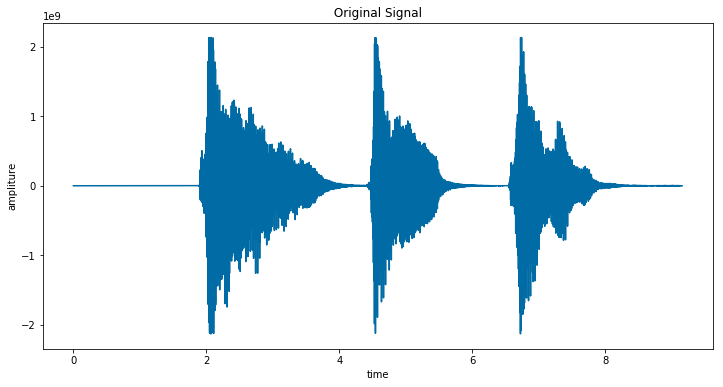

In [52]:
fig, axes = plt.subplots(figsize=(12,6),nrows=1, ncols=1)
axes.plot(time_series_vector,signal)
# axes.set_xlim(0,1000)
axes.set_title(' Original Signal ')
axes.set_xlabel('time')
axes.set_ylabel('ampliture')

In [54]:
y = np.fft.fft(signal)
y = abs(y)
y

array([5.38982968e+10, 3.35075447e+10, 1.34918591e+10, ...,
       3.57485729e+10, 1.34918591e+10, 3.35075447e+10])

In [56]:
freqs = np.arange(0,signal_len/2)*(signal_sample_rate/signal_len)
freqs

array([0.00000000e+00, 1.09265734e-01, 2.18531469e-01, ...,
       2.39996722e+04, 2.39997815e+04, 2.39998907e+04])

In [58]:
minpeak = 1000
minpeakdist = 25
# scipy_signal.find_peaks_cwt(y, freqs)

# Unit2: Bounday Value Problems

## mat_rec4

In [77]:
A = np.random.rand(10,10)
b = np.random.rand(10)

In [78]:
np.linalg.solve(A,b)

array([-0.14962773,  1.03197801,  0.15783825,  0.15359231,  0.10510959,
        0.44181665,  1.63373995, -0.62236093, -0.39254952, -0.46793473])

In [82]:
np.diag(A)
# np.diag(b)

array([0.16851635, 0.40837416, 0.19539128, 0.44201611, 0.31545626,
       0.26094335, 0.70994791, 0.53401745, 0.92367589, 0.51811464])

# Other